# ANP Forecasting de Preços de Combustiveis

### Carregamento de Dados

In [172]:
# Carregamento de bibliotecas
import pandas as pd
import sys
sys.path.append('../Utils')

from typing import Union
import plot_functions as plot
import tratamento_de_dados as transform

In [4]:
# Carregamento de dados
url_data = "https://raw.githubusercontent.com/AurelioGuilherme/ANP-ETL/refs/heads/main/Data/Data-silver/dados_combustiveis_anp.csv"
df = pd.read_csv(url_data)
df.head()

,DATA INICIAL,DATA FINAL,ESTADO,MUNICÍPIO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,COEF DE VARIAÇÃO REVENDA,periodo_referencia
0,2023-08-27 00:00:00,2023-09-02 00:00:00,SERGIPE,ARACAJU,ETANOL HIDRATADO,16,R$/l,4.79,0.095708,4.57,4.89,0.020,2023-08-27 a 2023-09-02
1,2023-08-27 00:00:00,2023-09-02 00:00:00,PARA,BELEM,ETANOL HIDRATADO,7,R$/l,4.66,0.328655,4.29,5.19,0.071,2023-08-27 a 2023-09-02
2,2023-08-27 00:00:00,2023-09-02 00:00:00,MINAS GERAIS,BELO HORIZONTE,ETANOL HIDRATADO,40,R$/l,3.50,0.108223,3.34,3.79,0.031,2023-08-27 a 2023-09-02
3,2023-08-27 00:00:00,2023-09-02 00:00:00,RORAIMA,BOA VISTA,ETANOL HIDRATADO,4,R$/l,4.94,0.140000,4.87,5.15,0.028,2023-08-27 a 2023-09-02
4,2023-08-27 00:00:00,2023-09-02 00:00:00,DISTRITO FEDERAL,BRASILIA,ETANOL HIDRATADO,49,R$/l,3.77,0.142499,3.58,3.99,0.038,2023-08-27 a 2023-09-02


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11816 entries, 0 to 11815
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DATA INICIAL                  11816 non-null  object 
 1   DATA FINAL                    11816 non-null  object 
 2   ESTADO                        11816 non-null  object 
 3   MUNICÍPIO                     11816 non-null  object 
 4   PRODUTO                       11816 non-null  object 
 5   NÚMERO DE POSTOS PESQUISADOS  11816 non-null  int64  
 6   UNIDADE DE MEDIDA             11816 non-null  object 
 7   PREÇO MÉDIO REVENDA           11816 non-null  float64
 8   DESVIO PADRÃO REVENDA         11816 non-null  float64
 9   PREÇO MÍNIMO REVENDA          11816 non-null  float64
 10  PREÇO MÁXIMO REVENDA          11816 non-null  float64
 11  COEF DE VARIAÇÃO REVENDA      11816 non-null  float64
 12  periodo_referencia            11816 non-null  object 
dtypes

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
NÚMERO DE POSTOS PESQUISADOS,11816.0,23.649120,28.015003,1.00,9.000000,17.00000,29.000000,210.000000
PREÇO MÉDIO REVENDA,11816.0,21.477609,36.954022,2.80,5.280000,5.95000,6.450000,137.300000
DESVIO PADRÃO REVENDA,11816.0,1.242986,2.707259,0.00,0.085004,0.16529,0.317528,14.972444
PREÇO MÍNIMO REVENDA,11816.0,19.362084,32.695987,2.39,4.990000,5.68000,6.260000,130.000000
PREÇO MÁXIMO REVENDA,11816.0,24.262389,42.565950,2.95,5.590000,6.29000,6.990000,160.000000
COEF DE VARIAÇÃO REVENDA,11816.0,0.035986,0.028131,0.00,0.015000,0.03000,0.050000,0.150000


### Tratamento de Dados

In [174]:
df_filtrado = transform.filtra_dados(df, 'sergipe', 'ETANOL HIDRATADO')
df_filtrado.head()

,DATA INICIAL,DATA FINAL,ESTADO,MUNICÍPIO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,COEF DE VARIAÇÃO REVENDA,periodo_referencia
0,2023-08-27 00:00:00,2023-09-02 00:00:00,SERGIPE,ARACAJU,ETANOL HIDRATADO,16,R$/l,4.79,0.095708,4.57,4.89,0.020,2023-08-27 a 2023-09-02
172,2023-09-03 00:00:00,2023-09-09 00:00:00,SERGIPE,ARACAJU,ETANOL HIDRATADO,17,R$/l,4.81,0.101297,4.57,4.89,0.021,2023-09-03 a 2023-09-09
343,2023-09-10 00:00:00,2023-09-16 00:00:00,SERGIPE,ARACAJU,ETANOL HIDRATADO,17,R$/l,4.79,0.111688,4.57,4.89,0.023,2023-09-10 a 2023-09-16
510,2023-09-17 00:00:00,2023-09-23 00:00:00,SERGIPE,ARACAJU,ETANOL HIDRATADO,16,R$/l,4.73,0.102038,4.57,4.89,0.022,2023-09-17 a 2023-09-23
676,2023-09-24 00:00:00,2023-09-30 00:00:00,SERGIPE,ARACAJU,ETANOL HIDRATADO,17,R$/l,4.78,0.060513,4.70,4.89,0.013,2023-09-24 a 2023-09-30


In [176]:
df_filtrado = transform.seleciona_features(df_filtrado, features=['DATA INICIAL',
                                                        'DATA FINAL',
                                                        'NÚMERO DE POSTOS PESQUISADOS',
                                                        'PRODUTO',
                                                        'ESTADO',
                                                        'PREÇO MÉDIO REVENDA'                                                  
                                                        ])

df_filtrado.head()

,DATA INICIAL,DATA FINAL,NÚMERO DE POSTOS PESQUISADOS,PRODUTO,ESTADO,PREÇO MÉDIO REVENDA
0,2023-08-27 00:00:00,2023-09-02 00:00:00,16,ETANOL HIDRATADO,SERGIPE,4.79
172,2023-09-03 00:00:00,2023-09-09 00:00:00,17,ETANOL HIDRATADO,SERGIPE,4.81
343,2023-09-10 00:00:00,2023-09-16 00:00:00,17,ETANOL HIDRATADO,SERGIPE,4.79
510,2023-09-17 00:00:00,2023-09-23 00:00:00,16,ETANOL HIDRATADO,SERGIPE,4.73
676,2023-09-24 00:00:00,2023-09-30 00:00:00,17,ETANOL HIDRATADO,SERGIPE,4.78


In [177]:
df_filtrado = transform.trata_datas(df_filtrado, ['DATA INICIAL', 'DATA FINAL'])
df_filtrado

,DATA INICIAL,DATA FINAL,NÚMERO DE POSTOS PESQUISADOS,PRODUTO,ESTADO,PREÇO MÉDIO REVENDA
0,2023-08-27,2023-09-02,16,ETANOL HIDRATADO,SERGIPE,4.79
172,2023-09-03,2023-09-09,17,ETANOL HIDRATADO,SERGIPE,4.81
343,2023-09-10,2023-09-16,17,ETANOL HIDRATADO,SERGIPE,4.79
510,2023-09-17,2023-09-23,16,ETANOL HIDRATADO,SERGIPE,4.73
676,2023-09-24,2023-09-30,17,ETANOL HIDRATADO,SERGIPE,4.78
...,...,...,...,...,...,...
10977,2024-12-15,2024-12-21,14,ETANOL HIDRATADO,SERGIPE,4.31
11142,2025-01-05,2025-01-11,12,ETANOL HIDRATADO,SERGIPE,4.36
11307,2025-01-12,2025-01-18,12,ETANOL HIDRATADO,SERGIPE,4.60
11478,2025-01-19,2025-01-25,12,ETANOL HIDRATADO,SERGIPE,4.65


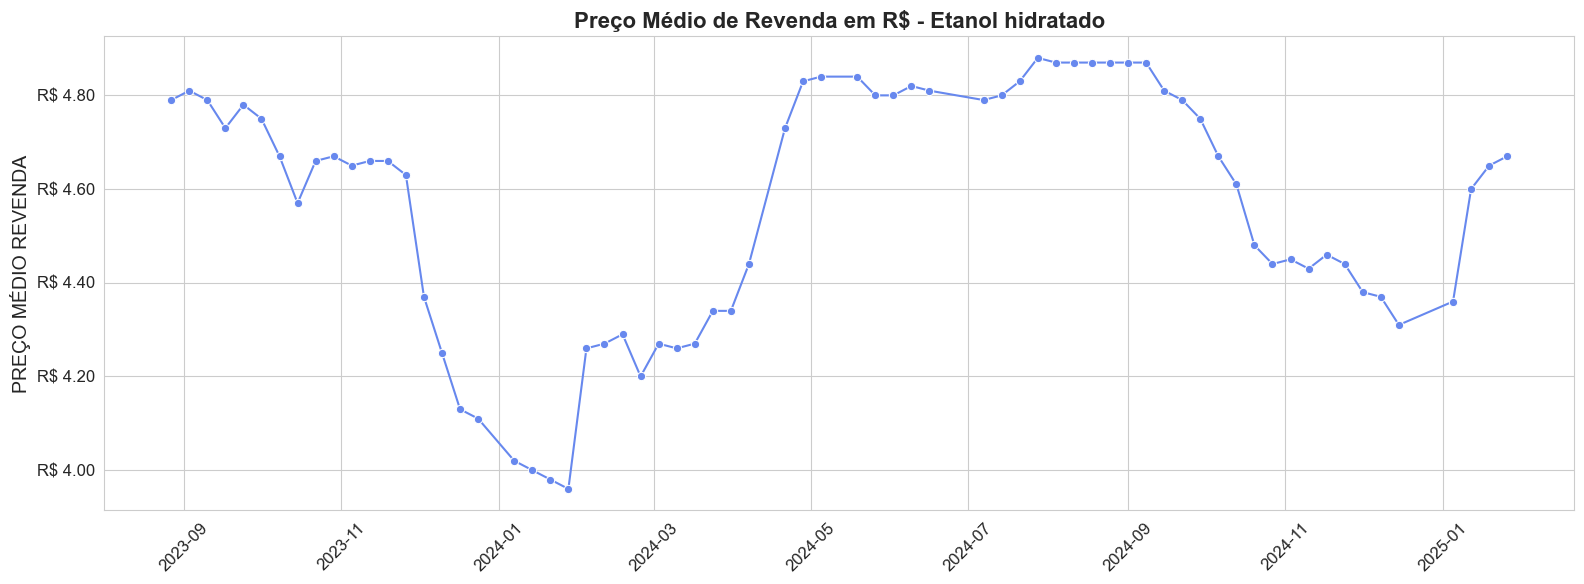

In [171]:
plot.visualiza_serie_temporal(df_filtrado, x = 'DATA INICIAL', y='PREÇO MÉDIO REVENDA')

### Modelagem

### Validação